# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Tokenization
3. Lemazitaion
4. Generating Word Frequency
5. EDA using Word Clouds
6. Text Cleaning

## 1. About the Dataset

In [1]:
#!python -m spacy download en_core_web_sm
#import en_core_web_sm
#tok = en_core_web_sm.load()
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 1.5 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import pandas as pd
path='drive/My Drive/Colab Notebooks/trinity/moby_dick/'

In [ ]:
#!unzip dataset.zip

In [6]:
# Getting list of all files in the folder
file_names=os.listdir(path='drive/My Drive/Colab Notebooks/trinity/moby_dick/')

In [7]:
len(file_names)

3

In [8]:
file_names[:3]

['moby_chp1.txt', 'moby_chp2.txt', 'moby_chp3.txt']

In [9]:
files=[]

# Filling the list with text data from all the files
for file_name in file_names:
    file=open(path+file_name,mode='r',encoding='utf-8')
    text=file.read()
    file.close()
    
    # Appending data to the list
    files.append(text)

In [11]:
# Creating dataframe from the list
df=pd.DataFrame(files,columns=['text'])

In [12]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (3, 1)


In [13]:
# Printing first three rows
df.head()
#print(df['text'][1])
#len(df['text'][1]) #Letters
#print(len(df['text'][1][:5]))

,text
0,CHAPTER 1\n\nLoomings.\n\n\nCall me Ishmael. ...
1,CHAPTER 2\n\nThe Carpet-Bag.\n\n\nI stuffed a ...
2,CHAPTER 3\n\nThe Spouter-Inn.\n\n\nEntering th...


In [ ]:
#Saving information
df.to_csv('drive/My Drive/Colab Notebooks/Reading Text data/moby_dick/dataframe.csv',index=False)

#2. TOKENIZATION IN SPACY


In [14]:
# Defining string
text= "I'm working as a Data Scientist in the U.S. and earning $140,000."

In [15]:
# Whitespace Tokenizer
print(text.split())

["I'm", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$140,000.']


In [16]:
import spacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Models in spaCy for English Language as of release 2.3.1:
- **en_core_web_sm:** 11MB
- **en_core_web_md:** 48MB
- **en_core_web_lg:** 746MB

In [17]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [18]:
# creating Doc object
doc=nlp(text)

In [19]:
doc

I'm working as a Data Scientist in the U.S. and earning $140,000.

In [20]:
type(doc)

spacy.tokens.doc.Doc

In [21]:
# spaCy Tokenizer
print([token for token in doc])

[I, 'm, working, as, a, Data, Scientist, in, the, U.S., and, earning, $, 140,000, .]


In [22]:
# Type of token
[type(token) for token in doc]

[spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token]

In [23]:
# Tokens as string
print([token.text for token in doc])

['I', "'m", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$', '140,000', '.']


In [24]:
# Comparing Whitespace and spaCy Tokenizer

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in doc])

["I'm", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$140,000.']
['I', "'m", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$', '140,000', '.']


In [ ]:
# No. of Tokens in Whitespace Tokenizer
print(len(text.split()))

# No. of Tokens in spaCy's Tokenizer
print(len(doc))

In [25]:
text="My phone has, a 20% battery left."

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in nlp(text)])

['My', 'phone', 'has,', 'a', '20%', 'battery', 'left.']
['My', 'phone', 'has', ',', 'a', '20', '%', 'battery', 'left', '.']


In [26]:
text="I ran 10km today."

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in nlp(text)])

['I', 'ran', '10km', 'today.']
['I', 'ran', '10', 'km', 'today', '.']


In [27]:
text="I know HTML, CSS, JavaScript, C++, and Node.js."

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in nlp(text)])

['I', 'know', 'HTML,', 'CSS,', 'JavaScript,', 'C++,', 'and', 'Node.js.']
['I', 'know', 'HTML', ',', 'CSS', ',', 'JavaScript', ',', 'C++', ',', 'and', 'Node.js', '.']


#3.- Lemmatization in spaCy

In [28]:
# Defining the string
text="The sky is clear and the stars are twinkling."

In [ ]:
import spacy

In [ ]:
# Loading spacy model
nlp=spacy.load('en_core_web_sm')

In [ ]:
# Creating doc object
doc=nlp(text)

In [29]:
# Lemmatizing the text
[(token.text,token.lemma_) for token in doc]

[('I', 'I'),
 ("'m", 'be'),
 ('working', 'work'),
 ('as', 'as'),
 ('a', 'a'),
 ('Data', 'Data'),
 ('Scientist', 'Scientist'),
 ('in', 'in'),
 ('the', 'the'),
 ('U.S.', 'U.S.'),
 ('and', 'and'),
 ('earning', 'earn'),
 ('$', '$'),
 ('140,000', '140,000'),
 ('.', '.')]

In [ ]:
text="The moon looks beautiful at night. it's hard to resist its beauty."

# Creating doc object
doc=nlp(text)

# Lemmatizing the text
[(token.text,token.lemma_) for token in doc]


## 3. Generating Word Frequency for all documents

In [ ]:
import spacy

In [ ]:
# Loading model
nlp=spacy.load('en_core_web_sm')
print("Pipeline:", nlp.pipe_names)

Pipeline: ['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']


In [30]:
# Combining chapters into a single string
combined_chapters=' '.join(df.text.values)
len(combined_chapters)


52534

In [33]:
print (df.text.values)

['CHAPTER 1\n\nLoomings.\n\n\nCall me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my purse, and nothing\nparticular to interest me on shore, I thought I would sail about a\nlittle and see the watery part of the world.  It is a way I have of\ndriving off the spleen and regulating the circulation.  Whenever I\nfind myself growing grim about the mouth; whenever it is a damp,\ndrizzly November in my soul; whenever I find myself involuntarily\npausing before coffin warehouses, and bringing up the rear of every\nfuneral I meet; and especially whenever my hypos get such an upper\nhand of me, that it requires a strong moral principle to prevent me\nfrom deliberately stepping into the street, and methodically knocking\npeople\'s hats off--then, I account it high time to get to sea as soon\nas I can.  This is my substitute for pistol and ball.  With a\nphilosophical flourish Cato throws himself upon his sword; I quietly\ntake to the ship.  There is noth

In [31]:
# Creating Doc object
doc=nlp(combined_chapters)



In [36]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies 
    #see Dataframe.value_counts:Return a Series containing counts of unique rows in the DataFrame.
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    #Series is like and a vector but inmutable and each element separte by coma
    
    # Printing frequencies: is the number of most frecuents words
    print(word_freq[:20])
  
    
    return word_freq

In [47]:
# Getting word frequency
#See pandas.Series
word_freq=gen_freq(doc)
#accessing serie
word_freq.keys()
word_freq[:3]
word_freq['the']
#word_freq[['Ishmael','ship']]
print(word_freq.size)
print(len(word_freq))

the     418
a       309
and     257
of      245
I       186
to      180
in      164
that    109
it      105
--       90
-        90
he       79
was      77
his      71
you      70
"        68
is       64
me       64
as       62
with     57
dtype: int64
2990
2990


## Exercise
Rewrite the function gen_freq to get `max` number of frecuente words


In [48]:
# Function for generating word frequency
def gen_freq_max(tokens,____):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    #Series is like and a vector but inmutable and each element separte by coma
    
    # Printing frequencies: is the number of most frecuents words
    print(word_freq[:___])
   #word_freq=word_freq[:max]
    return word_freq

max=5
word_freq=gen_freq_max(doc,max)

InvalidIndexError: ignored

In [ ]:
print('No. of unique words before cleaning=>',len(word_freq))
type(word_freq)

## 4. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by - 

`pip install wordcloud`

In [38]:
#Importing libraries
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=100,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()

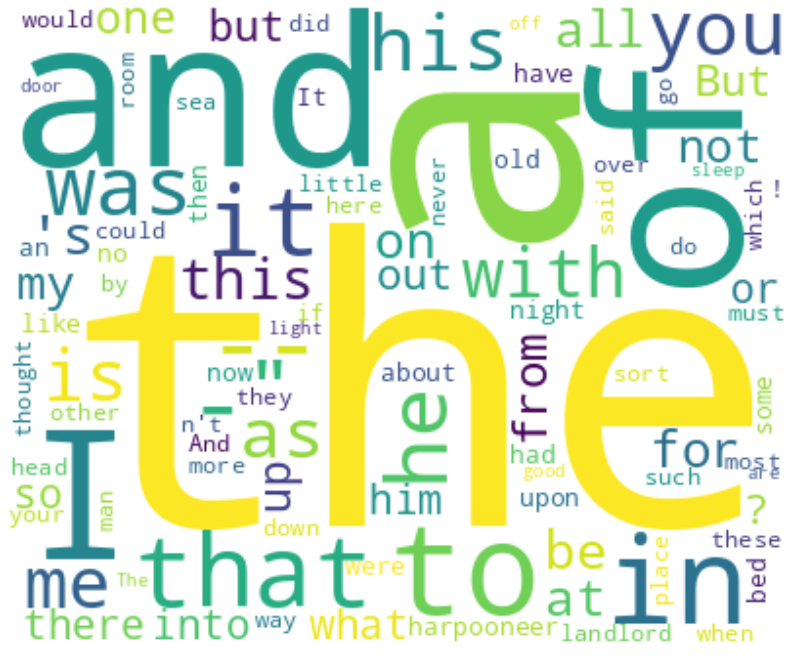

In [49]:
# Generating wordcloud
generate_wordcloud(word_freq)

#plt.savefig('word_cloud.png')

# What is it happening??

## 5. Text Cleaning 

In [43]:
import re

In [41]:
# Cleaning text quotes, quuestion marks, exclamatin marks, period, coma, brakets,semicolon, dash
def clean_text(string1):
    output = string1.strip()
    replacements = (
      ("“", ''), ("”", ''), ("//", ""), ("«", ''), ("»", ''), (",", ''),
      (";", ''), (".", ''),
    )
    for replacement in replacements:
        output = output.replace(*replacement)
    # Any sequence of two or more spaces should be converted into one space
    output = re.sub(r'\t+', ' ', output)
    output = re.sub(r'\n{1,}', '', output)
    output = re.sub(r' {2,}', ' ', output)     
    return output.strip()

In [44]:
text = clean_text(combined_chapters)
# Lowercasing the text
print ("Lenght before cleaning {0} and length after cleaning {1}".format(len(combined_chapters),len(text)))
combined_chapters=text.lower()

Lenght before cleaning 52534 and length after cleaning 50083


In [46]:
# Creating Doc object
doc=nlp(text)


# What are Stop words?
Stopwords are the most common words in a language which are added to make things more understandable to humans. Like in English we have `a, an, the, for, where, when, at,` etc. These words are removed during text pre-processing phase because these words do not add much value to the meaning of the document.

Due to stopwords a lot of resources get wasted in storing and pre-processing these. Removing them makes the process of analysis and model building faster because the corpus size gets reduced due to it.

Consider a sample sentence:
##### String: "There is a pen on the table."
##### Stopwords: \["There", "is", "a", "on", "the" \]
##### Meaningful words: \["pen", "table"\]

## Remove Stopwords:
- Text Classification
- Caption Generation
- Auto-Tag Generation

## Don't Remove Stopwords:
- Machine Translation
- Language Modeling
- Text Summarization
- Question-Answering Problems

In [50]:
print(nlp.Defaults.stop_words)

{'myself', 'somewhere', "'ve", 'since', 'above', 'see', 'rather', 'further', 'nowhere', 'thence', 'its', 'never', 'go', 'first', 'afterwards', 'towards', 'around', 'behind', 'except', 'too', 'cannot', 'she', 'all', 'between', 'forty', 'yourselves', 'almost', 'other', 'every', 'last', 'show', 'hereafter', 'those', 'can', 'namely', 'always', 'herself', 'n’t', 'not', 'therein', 'ten', 'over', 'else', 'hers', 'eleven', 'had', 'was', 'four', 'one', 'together', 'seem', 'along', 'any', 'everywhere', 'alone', 'them', 'herein', 'do', 'make', 'noone', 'another', 'bottom', 'fifteen', 'whereas', 'though', 'also', "'m", 'being', 'after', 'anyone', 'thereby', 'been', 'two', 'some', 'sometime', 'themselves', 'thru', 'without', 'per', 'anyway', 'via', 'our', 'about', 'back', 'made', 'an', 'until', 'thereafter', 'everyone', 'ever', "'re", 'ca', 'nothing', 'through', '’ll', 'just', 'thus', "'d", 'my', 'hence', 'their', 'give', 'unless', 'now', 're', 'his', 'that', 'both', 'beyond', 'such', 'whereby', 'm

In [51]:
len(nlp.Defaults.stop_words)
#nlp.Defaults.stop_words.add("my_new_stopword")
#nlp.Defaults.stop_words.remove("whatever")
#nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}
#or |= or -=

326

In [52]:
# Removing stopwords and punctuations
new_tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [53]:
len(new_tokens)
#print(new_tokens)

4007

In [54]:
# Getting word frequencies
word_freq=gen_freq(new_tokens)

harpooneer    28
old           25
bed           24
like          21
night         21
little        19
sort          18
said          17
man           17
room          17
thought       16
landlord      15
sea           15
head          14
good          13
sleep         13
light         13
way           13
place         13
door          12
dtype: int64


In [ ]:
print('No. of unique words=>',len(word_freq))

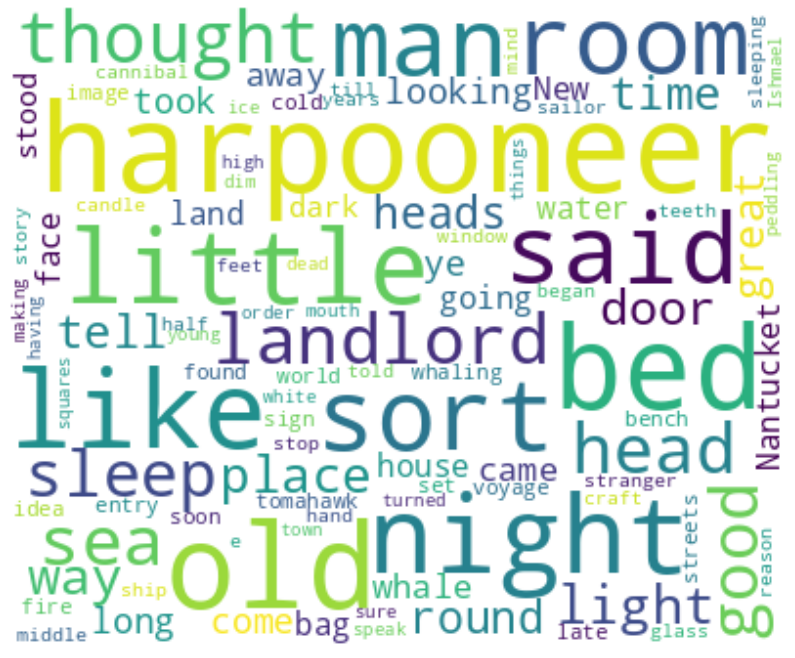

In [56]:
# Generating wordcloud
generate_wordcloud(word_freq)

# Exercise
## Calculate word cloud for each chapter.

In [ ]:
# We have already the three chapters in the Dataframe df
chapt1=__(df['text'][_])
chapt2=__(df['text'][___])
chapt3=__(df['text'][_])
type(chapt1)

In [ ]:
# We can use both word frecuencies since we do not limit the lenght of the variable but only the number of words we print
max=5
# Getting word frequency
word_freq1=______(chapt1,max)
# Getting word frequency
word_freq2=_______(chapt2)
# Getting word frequency
word_freq3=gen_freq_max(_____3)
print('No. of unique words chapter1=>',__(word_freq1))
print('No. of unique words chapter2=>',__(word_freq2))
print('No. of unique words chapter3=>',__(word_freq3))

In [ ]:
generate_wordcloud(word_freq1)

In [ ]:
generate_wordcloud(word_freq2)

In [ ]:
generate_wordcloud(word_freq3)

In [ ]:
#Lenght
print("length chapter 1 {}".format(len(chapt1)))
print("length chapter 2 {}".format(len(chapt2)))
print("length chapter 3 {}".format(len(chapt3)))

In [ ]:
chapt1[0].tag_

In [ ]:
for token in chapt1:
    print(token.text, token.pos_, token.dep_)

In [ ]:
# We have already the three chapters in the Dataframe df
chapt1=nlp(df['text'][0])
chapt2=nlp(df['text'][1])
chapt3=nlp(df['text'][2])
type(chapt1)

#SOLUTION

In [ ]:
# We can use both word frecuencies since we do not limit the lenght of the variable but only the number of words we print
max=5
# Getting word frequency
word_freq1=gen_freq_max(chapt1,max)
# Getting word frequency
word_freq2=gen_freq_max(chapt2)
# Getting word frequency
word_freq3=gen_freq_max-(chapt3)
print('No. of unique words chapter1=>',len(word_freq1))
print('No. of unique words chapter2=>',len(word_freq2))
print('No. of unique words chapter3=>',len(word_freq3))

In [ ]:
generate_wordcloud(word_freq1)

In [ ]:
generate_wordcloud(word_freq2)

In [ ]:
generate_wordcloud(word_freq3)

In [ ]:
#Lenght
print("length chapter 1 {}".format(len(chapt1)))
print("length chapter 2 {}".format(len(chapt2)))
print("length chapter 3 {}".format(len(chapt3)))

In [ ]:
chapt1[0].tag_

In [ ]:
for token in chapt1:
    print(token.text, token.pos_, token.dep_)

# EXERCISE
In this exercise, you’ll create the Doc and Span objects manually, and update the named entities – just like spaCy does behind the scenes. A shared nlp object has already been created.

Import the Doc and Span classes from spacy.tokens.
Use the Doc class directly to create a doc from the words and spaces.
Create a Span for “David Bowie” from the doc and assign it the label "PERSON".
Overwrite the doc.ents with a list of one entity, the “David Bowie” span.

In [ ]:

# Import the Doc and Span classes
from spacy.____ import ____, ____

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = ____(____, ____, ____)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = ____(____, ____, ____, label=____)
print(span.text, span.label_)

# Add the span to the doc's entities
____.____ = [____]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

#Solution

In [ ]:

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

# #Look for a NOUN AFTER A VERB

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

In [ ]:
import spacy

nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", None, *animal_patterns)

# Define the custom component
def animal_component(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe(animal_component, after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])